In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data_1 = []

for n in range(1, 12*10 + 1): # 10 years of monthly data.

  error = np.random.normal(loc = 0, scale = 2.5)
  value = 1.5*n + 25 + error

  if n%12 == 0: # On the final month of each year, we introduce some seasonality.
    value -= 25

  if n%12 == 1: # On the first month of each year, we introduce some seasonality.
    value += 25

  data_1.append(value)


ts = np.array(data_1)

print(ts)


[ 50.78398627  29.20577628  30.66242351  30.81565629  32.38605311
  33.56581898  33.95814276  34.49754448  34.87833342  40.65863662
  40.06372946  17.26915817  70.9194988   48.5185205   50.23225792
  47.65286051  50.3975672   54.88895131  47.28370653  55.37464665
  53.77871415  55.54318743  59.1955105   35.76277609  88.51921568
  63.88511587  63.05876041  70.5960213   72.54821781  71.08114375
  69.75630133  71.88104712  73.65683587  73.44064447  82.4451782
  56.38392503 106.57164084  77.95087757  78.86941917  87.21783555
  84.2734392   87.92157804  91.04004568  88.73703504  86.23527317
  95.37948921  93.89782393  74.47879732 123.91149075  98.72120491
  99.41203165  99.58328098 106.53199619 110.11618866 105.87325605
 113.77009137 111.59624444 111.3542341  112.81281003  88.37680524
 143.58766615 123.37558912 119.94446396 119.40570867 120.00076718
 120.85203923 127.71862387 132.35882231 132.31858173 128.37287735
 130.96994998 109.88164108 158.40083574 136.71163166 138.05363168
 143.140120

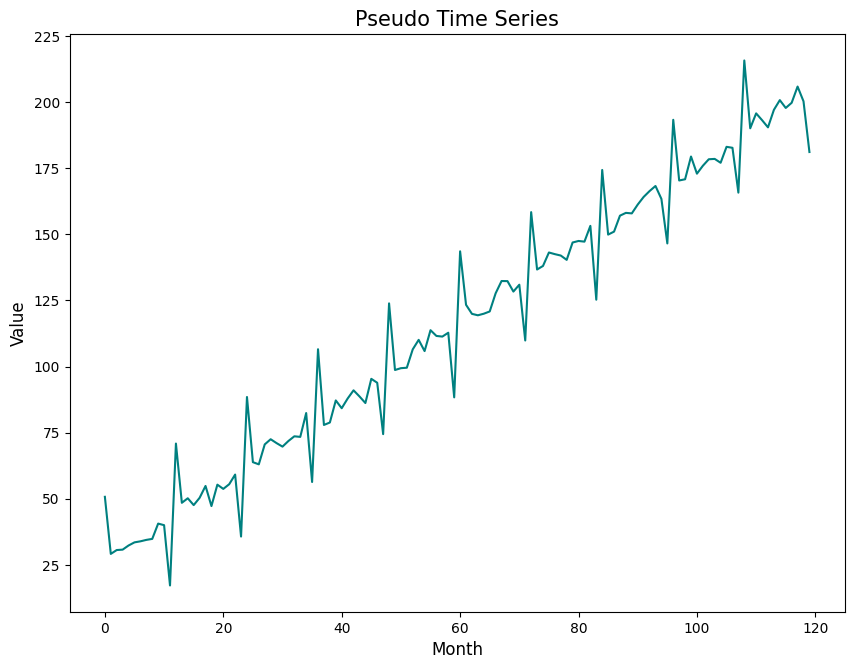

In [3]:
fig, ax = plt.subplots(figsize = (10, 7.5))

arial = {"family": "Arial Black"}

ax.plot(ts, c = "teal")
ax.set_title(label = "Pseudo Time Series", fontsize = 15)
ax.set_xlabel(xlabel = "Month", fontsize = 12)
ax.set_ylabel(ylabel = "Value", fontsize = 12)

plt.show()

In [4]:
start_date = dt.date(year = 2018, month = 1, day = 1)

dates = pd.date_range(start = start_date, periods = 12*10, freq = "MS")

ts_df = pd.DataFrame(data = ts, index = dates)

ts_df.tail(6)

,0
2027-07-01,200.738425
2027-08-01,197.784683
2027-09-01,199.731918
2027-10-01,205.868547
2027-11-01,200.297146
2027-12-01,181.122846


In [5]:
new_data = np.array([190, 194, 195, 194, 195, 180])
dates_1 = pd.date_range(start = ts_df.index[-6], periods = 6, freq = "MS")

test_df = pd.DataFrame(data = new_data, index = dates_1)

test_df

,0
2027-07-01,190
2027-08-01,194
2027-09-01,195
2027-10-01,194
2027-11-01,195
2027-12-01,180


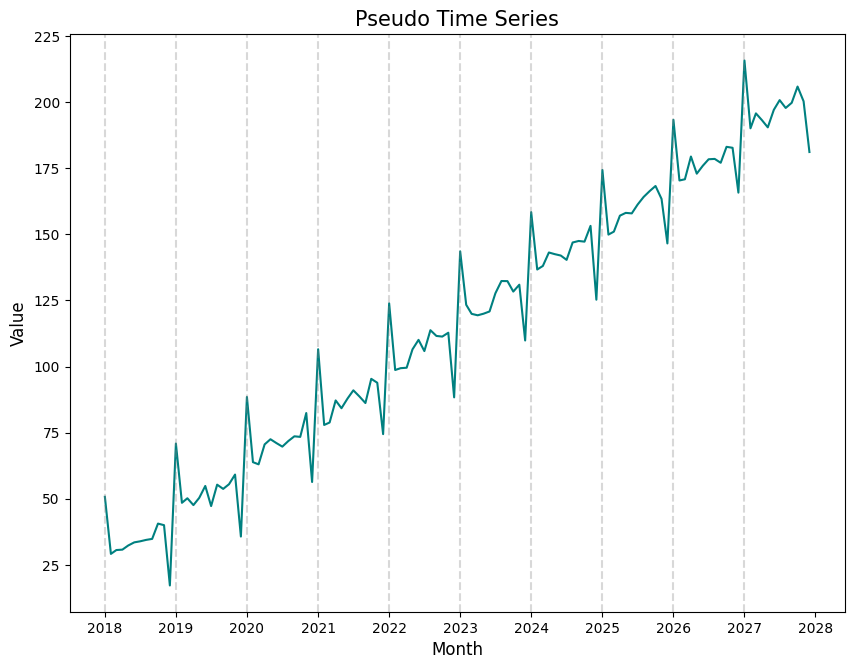

In [6]:
fig, ax = plt.subplots(figsize = (10, 7.5))

arial = {"family": "Arial Black"}

ax.plot(ts_df, c = "teal")
ax.set_title(label = "Pseudo Time Series", fontsize = 15)
ax.set_xlabel(xlabel = "Month", fontsize = 12)
ax.set_ylabel(ylabel = "Value", fontsize = 12)

for year in range(ts_df.index[0].year, ts_df.index[-1].year + 1):
  ax.axvline(pd.to_datetime(str(year) + "-01-01"), c = "grey", linestyle = "--", alpha = 0.3)

plt.show()

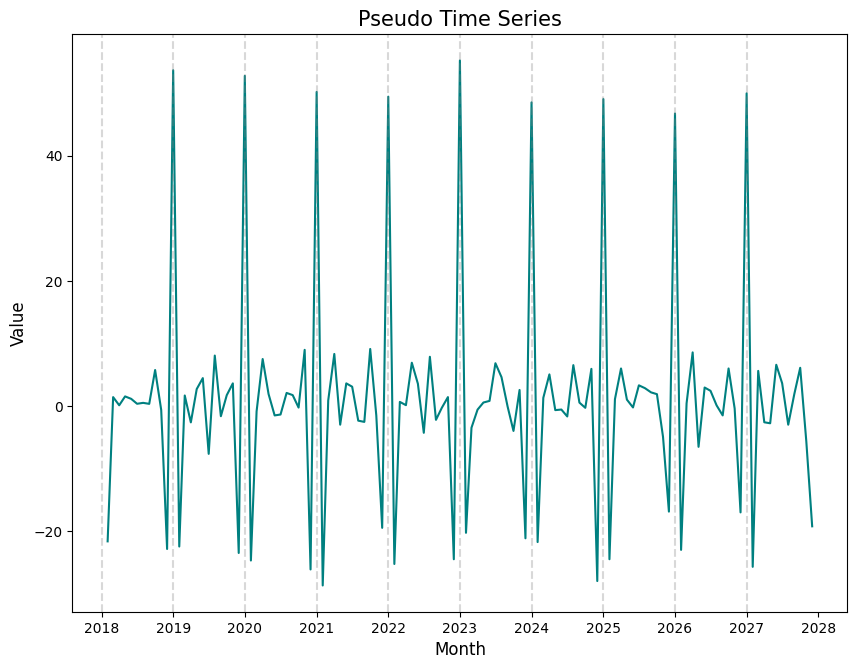

In [7]:
diff_df = ts_df.diff(periods = 1) # Removing linearity so can apply the ACF and PACF.

fig, ax = plt.subplots(figsize = (10, 7.5))

ax.plot(diff_df, c = "teal")
ax.set_title(label = "Pseudo Time Series", fontsize = 15)
ax.set_xlabel(xlabel = "Month", fontsize = 12)
ax.set_ylabel(ylabel = "Value", fontsize = 12)

for year in range(ts_df.index[0].year, ts_df.index[-1].year + 1):
  ax.axvline(pd.to_datetime(str(year) + "-01-01"), c = "grey", linestyle = "--", alpha = 0.3)

plt.show() # The series without the trend.

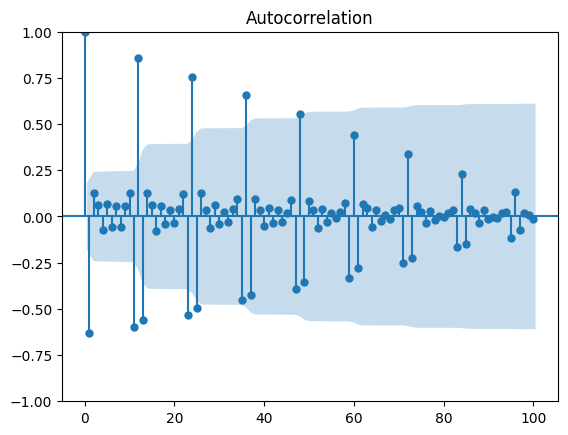

In [8]:
ACF_1 = plot_acf(x = diff_df[1:], lags = 100)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


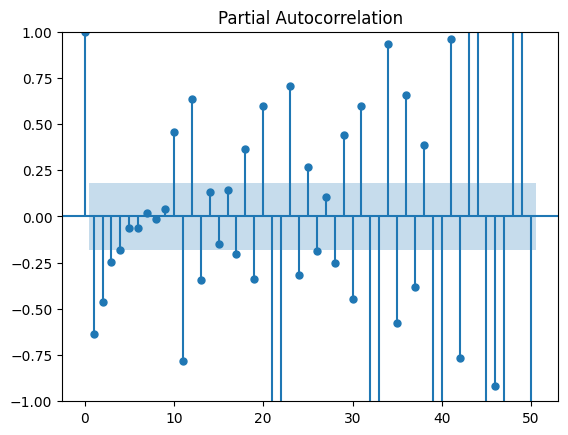

In [9]:
PACF_1 = plot_pacf(x = diff_df[1:], lags = 50)

In [10]:
train_test_split = 0.80 # 80% train/test split.

train = ts_df[:int(0.80*ts_df.shape[0])]
test = ts_df[int(0.80*ts_df.shape[0]):]

In [11]:
base_order = (0, 1, 0) #
seasonal_order = (1, 0, 1, 12)

seasonal_model = SARIMAX(train, order = base_order, seasonal_order = seasonal_order)

In [12]:
seasonal_fitted_mod = seasonal_model.fit()

seasonal_fitted_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    0   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -281.995
Date:                              Tue, 27 Jun 2023   AIC                            569.990
Time:                                      04:39:28   BIC                            577.652
Sample:                                  01-01-2018   HQIC                           573.086
                                       - 12-01-2025                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.001    989.104      0.000       0.998       1.002
ma.S.L12      -0.9292      0.335     -2.778      0.005      -1.585      -0.274
sigma2        12.0171      3.854      3.118      0.002       4.464      19.570
===================================================================================
Ljung-Box (L1) (Q):                  11.31   Jarque-Bera (JB):                 3.52
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               1.04   Skew:                             0.47
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
test_start = test.index[0] # Start and end dates for the test set.
test_end = test.index[-1]

SARIMA_pred = seasonal_fitted_mod.predict(start = test_start, end = test_end)

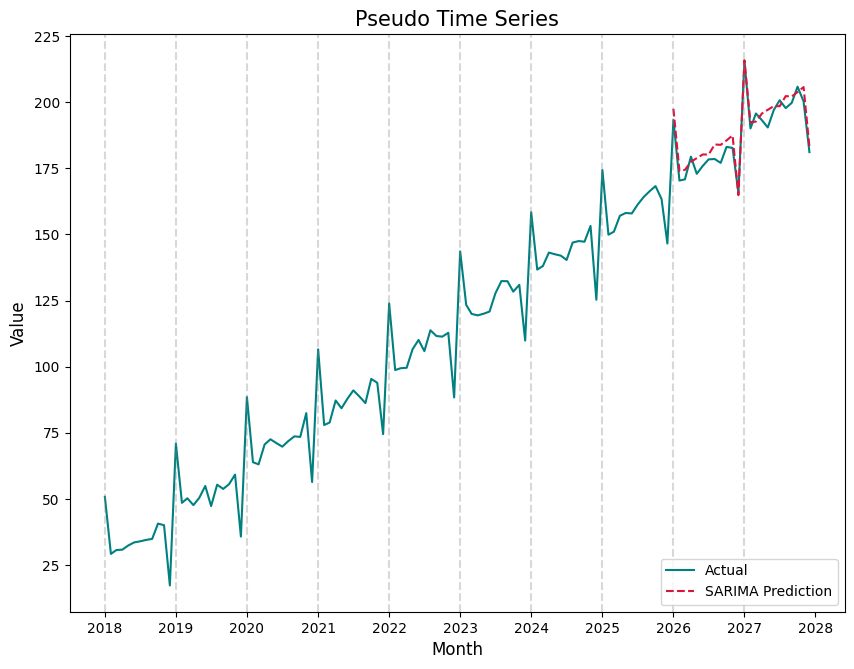

In [14]:
fig, ax = plt.subplots(figsize = (10, 7.5))

ax.plot(ts_df, c = "teal", label = "Actual")
ax.set_title(label = "Pseudo Time Series", fontsize = 15)
ax.set_xlabel(xlabel = "Month", fontsize = 12)
ax.set_ylabel(ylabel = "Value", fontsize = 12)

ax.plot(SARIMA_pred, c = "crimson", linestyle = "--", label = "SARIMA Prediction")

for year in range(ts_df.index[0].year, ts_df.index[-1].year + 1):
  ax.axvline(pd.to_datetime(str(year) + "-01-01"), c = "grey", linestyle = "--", alpha = 0.3)

ax.legend()

plt.show()